In [3]:
from qiskit import*
from qiskit.visualization import plot_histogram

Quantum teleportation:To transmit one qubit using two quantum bits

In [4]:
qr=QuantumRegister(3)
cr0=ClassicalRegister(1)
cr1=ClassicalRegister(1)
cr2=ClassicalRegister(1)
circuit=QuantumCircuit(qr,cr0,cr1,cr2)

In [5]:
circuit.x(qr[0])#modifyable
circuit.h(qr[1])
circuit.cx(qr[1],qr[2])
circuit.cx(qr[0],qr[1])
circuit.h(qr[0])
circuit.measure(qr[0],cr0[0])
circuit.measure(qr[1],cr1[0])
circuit.z(qr[2]).c_if(cr0,1)
circuit.x(qr[2]).c_if(cr1,1)
circuit.measure(qr[2],cr2[0])

In [6]:
circuit.draw()

┌───┐          ┌───┐┌─┐                 
q0_0: ┤ X ├───────■──┤ H ├┤M├─────────────────
      ├───┤     ┌─┴─┐└┬─┬┘└╥┘                 
q0_1: ┤ H ├──■──┤ X ├─┤M├──╫──────────────────
      └───┘┌─┴─┐└───┘ └╥┘  ║  ┌───┐  ┌───┐ ┌─┐
q0_2: ─────┤ X ├───────╫───╫──┤ Z ├──┤ X ├─┤M├
           └───┘       ║   ║  └─╥─┘  └─╥─┘ └╥┘
                       ║   ║ ┌──╨──┐   ║    ║ 
c0: 1/═════════════════╬═══╩═╡ 0x1 ╞═══╬════╬═
                       ║   0 └─────┘┌──╨──┐ ║ 
c1: 1/═════════════════╩════════════╡ 0x1 ╞═╬═
                       0            └─────┘ ║ 
c2: 1/══════════════════════════════════════╩═
                                            0

{'1 1 1': 273, '1 0 0': 250, '1 0 1': 236, '1 1 0': 265}


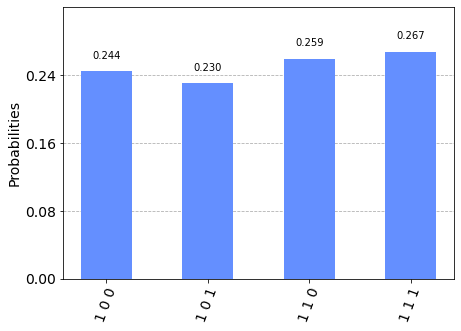

In [7]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(circuit).result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)
